# <span style="color:blue;"> Summary </span>

**Bellabeat**, a high-tech company, manufactures health-focus products for woman including Bellabeat app, Leaf, Time, Spring and Bellabeat membership. Bellabeat is a successful company, but it has potential to rise head in global smart device market. To get insight about the trends of smart device usage, stakeholders asked data analyst team to analyse how customers use non-Bellabeat smart devices. The results will lead marketing strategy of the company.

As a data analyst who is responsible to analyse smart devices, I will follow six steps of data analysis.

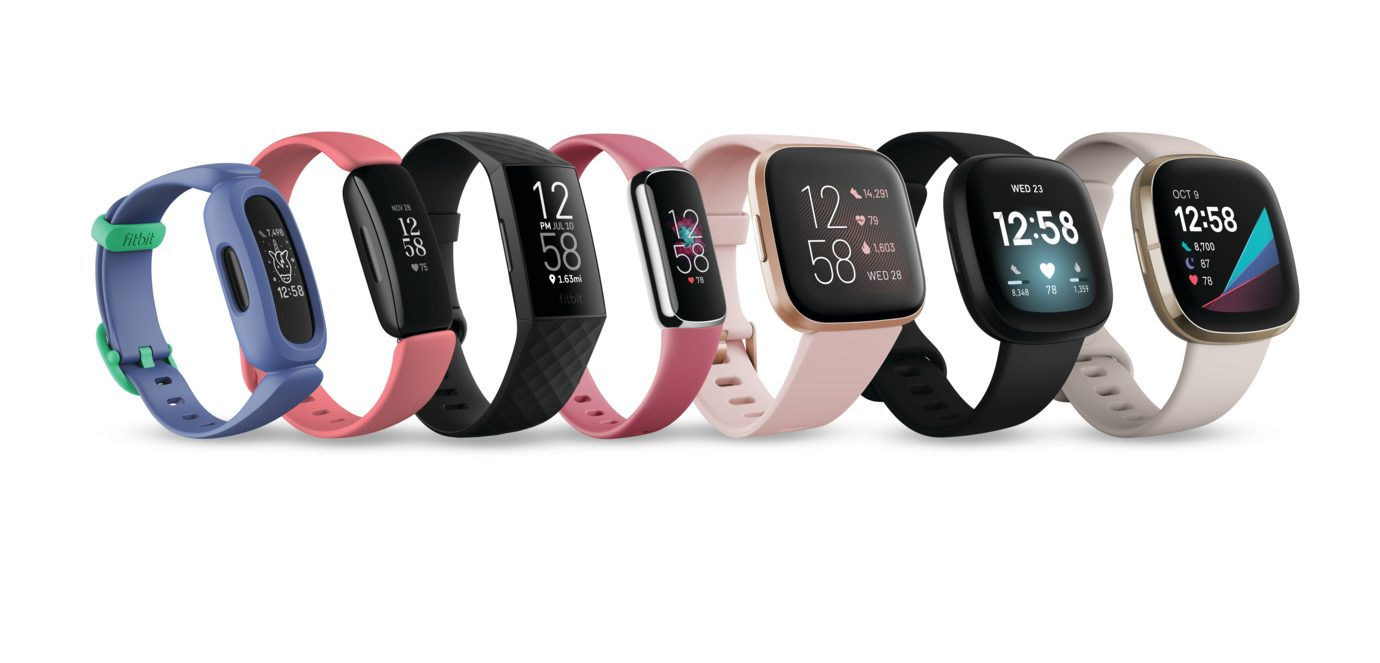

# <span style="color:blue;"> 1. Ask </span>


What are some trends in smart device usage?

How could these trends apply to Bellabeat customers?

How could these trends help influence Bellabeat marketing strategy?

# <span style="color:blue;"> 2. Prepare </span>


The data is avaialble in <span style="color:green;"> FitBit Fitness Tracker Data </span> and contains 18 csv files.

I will use R to process, analyse and visualize the data.

# <span style="color:blue;"> 3. Process </span> 


**3.1 Loading libraries**

The required libraries should be installed.

In [1]:
# loading the libraries

library(tidyverse)      
library(readr)
library(dplyr)
library(skimr)
library(here)
library(janitor)
library(purrr)
library(ggplot2)
library(gt)
library(ggcorrplot)
library(ggpubr)
library(corrplot)
library(scales)
library(ggExtra)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
here() starts at /kaggle/working


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


corrplot 0.92 loaded


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




**3.2 Importing Selected datasets**

Since the main focus is on the trend, I decide to remove the files that track activity in minutes.

In [2]:
# importing data

dailyActivity <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
hourlyCalories <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hourlyIntensities <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
hourlySteps <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
heartrateSeconds <- read_csv ("../input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
sleepDay <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weightLogInfo <- read.csv(file= "../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 22099 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, Calories

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 22099 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (3): Id, TotalIntensity, AverageIntensity

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_ty

**3.3 Verifying data**

The data in three files (dailyIntensities, dailySteps and dailyCalories) are present in dailyActivity file. So, I skip those three and instead only use dailyActivity file.

Each file in dataset has a common column, Id. So, I used it to see if the data is comprehensive

In [3]:
# number of participant(Id) in each file

n_distinct(dailyActivity$Id)
n_distinct(heartrateSeconds$Id)
n_distinct(hourlyCalories$Id)
n_distinct(hourlyIntensities$Id)
n_distinct(hourlySteps$Id)
n_distinct(sleepDay$Id)
n_distinct(weightLogInfo$Id)

[1] 33

[1] 14

[1] 33

[1] 33

[1] 33

[1] 24

[1] 8

There are only 14 participants in heartrate_seconds file and 8 in weightLogInfor file. These two files remove from further process.

To get an overview about the dataset, number of columns and rows, I use glimpse from dplyr library.

In [4]:
# display some portion of the data 

glimpse(dailyActivity)
glimpse(hourlyCalories)
glimpse(hourlyIntensities)
glimpse(hourlySteps)
glimpse(sleepDay)

Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

**3.4 Formatting the name**

In [5]:
# formatting the name of each column

clean_names(head(dailyActivity))

clean_names(head(hourlyCalories))

clean_names(head(hourlyIntensities))

clean_names(head(sleepDay))


id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


id,activity_hour,calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,81
1503960366,4/12/2016 1:00:00 AM,61
1503960366,4/12/2016 2:00:00 AM,59
1503960366,4/12/2016 3:00:00 AM,47
1503960366,4/12/2016 4:00:00 AM,48
1503960366,4/12/2016 5:00:00 AM,48


id,activity_hour,total_intensity,average_intensity
<dbl>,<chr>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,20,0.333333
1503960366,4/12/2016 1:00:00 AM,8,0.133333
1503960366,4/12/2016 2:00:00 AM,7,0.116667
1503960366,4/12/2016 3:00:00 AM,0,0.000000
1503960366,4/12/2016 4:00:00 AM,0,0.000000
1503960366,4/12/2016 5:00:00 AM,0,0.000000


id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


**3.5 Data cleaning**

Clean data is important to avoid incorrect analysis and wrong conclusion. To clean the data, duplicates and N/A should be removed from dataset

In [6]:
# finding duplicates

sum(duplicated(dailyActivity))
sum(duplicated(hourlyCalories))
sum(duplicated(hourlyIntensities))
sum(duplicated(hourlySteps))
sum(duplicated(sleepDay))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 3

Among the 5 tested files, sleepDay file contains 3 duplicates that need to get rid of.

In [7]:
# remove duplication

sleepDay <- sleepDay%>%
distinct()
sum(duplicated(sleepDay))

[1] 0

Next step is to clear N/A from the data.

In [8]:
# clear away N/A

dailyActivity <- dailyActivity %>%
  drop_na()
hourlyCalories <- hourlyCalories %>%
  drop_na()
hourlyIntensities <- hourlyIntensities %>%
  drop_na()
hourlySteps <- hourlySteps %>%
  drop_na()
sleepDay <- sleepDay %>%
  drop_na()

To verify all N/A removed from data, I use is.na function.

In [9]:
# data cleaning verification

sum(is.na(dailyActivity))
sum(is.na(hourlyCalories))
sum(is.na(hourlyIntensities))
sum(is.na(hourlySteps))
sum(is.na(sleepDay))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

**3.6 Formatting the date and time**

To change the format of date and time, I used POSIXct.

In [10]:
dailyActivity$ActivityDate=as.POSIXct(dailyActivity$ActivityDate, format = "%m/%d/%Y",tz = Sys.timezone())

hourlyCalories$ActivityHour=as.POSIXct(hourlyCalories$ActivityHour, format = "%m/%d/%Y %I:%M:%S %p",tz = Sys.timezone())

hourlyIntensities$ActivityHour=as.POSIXct(hourlyIntensities$ActivityHour, format = "%m/%d/%Y %I:%M:%S %p",tz = Sys.timezone())

hourlySteps$ActivityHour=as.POSIXct(hourlySteps$ActivityHour, format = "%m/%d/%Y %I:%M:%S %p",tz = Sys.timezone())

sleepDay$SleepDay=as.POSIXct(sleepDay$SleepDay, format = "%m/%d/%Y %I:%M:%S %p",tz = Sys.timezone())

**3.7 Merging datasets**

To make data analysis easier, I decided to merge hourly data and make a new data frame.

In [11]:
# merging hourly datsets

hourlyData <- list( hourlyCalories, hourlyIntensities, hourlySteps) %>%
 reduce(inner_join, By = "Id")
 head(hourlyData, 10)

Joining, by = c("Id", "ActivityHour")
Joining, by = c("Id", "ActivityHour")


Id,ActivityHour,Calories,TotalIntensity,AverageIntensity,StepTotal
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12 00:00:00,81,20,0.333333,373
1503960366,2016-04-12 01:00:00,61,8,0.133333,160
1503960366,2016-04-12 02:00:00,59,7,0.116667,151
1503960366,2016-04-12 03:00:00,47,0,0.000000,0
1503960366,2016-04-12 04:00:00,48,0,0.000000,0
1503960366,2016-04-12 05:00:00,48,0,0.000000,0
1503960366,2016-04-12 06:00:00,48,0,0.000000,0
1503960366,2016-04-12 07:00:00,47,0,0.000000,0
1503960366,2016-04-12 08:00:00,68,13,0.216667,250


# <span style="color:blue;"> 4-5. Analyse & Share data  </span> 


**4-5.1 Smart device usage**

To get better idea about smart device usage, the total number of used days were calcualted. Then usage_percentage was calculated according to the number of days.

The usage categorized in three groups:

0%-35% = Low use

36%-70% = Moderate use

71%-100% = High usage

In [12]:
dailyUse <- dailyActivity %>%
  group_by(Id) %>%
  summarize(number_of_days = length(unique(ActivityDate))) %>%
  mutate(usage_percentage=(number_of_days/31)*100)%>%
  mutate(usage = case_when(
    usage_percentage >= 0 & usage_percentage <= 35 ~ "Low Use",
    usage_percentage >= 36 & usage_percentage <= 70 ~ "Moderate Use", 
    usage_percentage >= 71 & usage_percentage <= 100 ~ "High Use")
        ) %>% 
  group_by(usage)
head(dailyUse)

Id,number_of_days,usage_percentage,usage
<dbl>,<int>,<dbl>,<chr>
1503960366,31,100.00000,High Use
1624580081,31,100.00000,High Use
1644430081,30,96.77419,High Use
1844505072,31,100.00000,High Use
1927972279,31,100.00000,High Use
2022484408,31,100.00000,High Use


In [13]:
# minimun and maximum uasage per month

min(dailyUse$number_of_days)
max(dailyUse$number_of_days)

[1] 4

[1] 31

The minimum day that a participant used smart device is 4 days and the maximun is 31 days.

To undrestand the data in more detailed way, let's make a bar chart with ggplot.

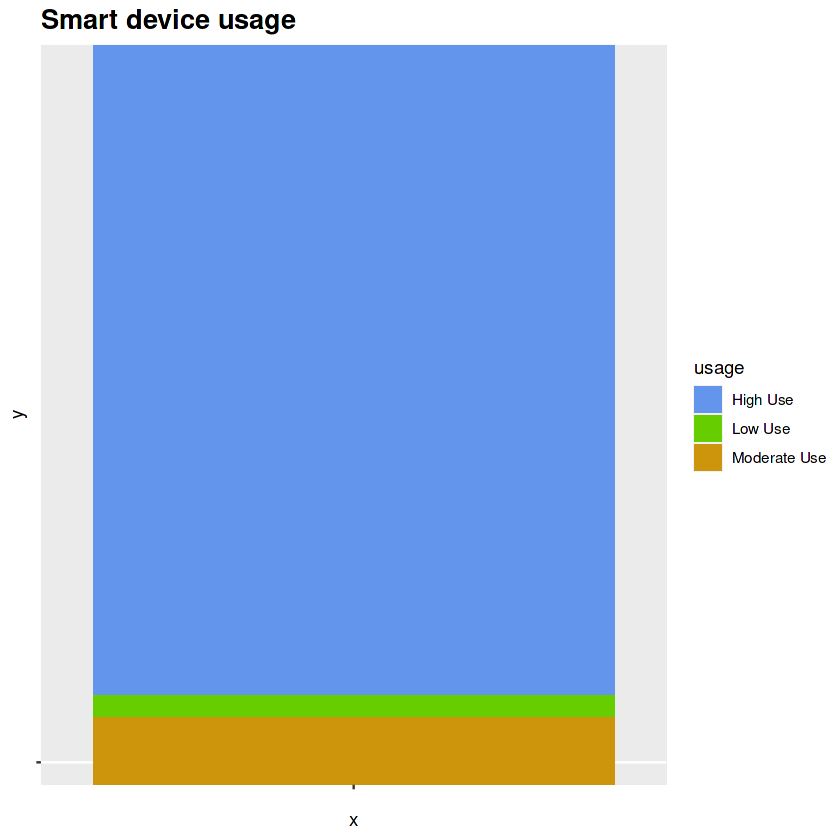

In [14]:
# smart device usage

ggplot(dailyUse, aes(x="", y= "", fill = usage)) +
  geom_bar(width = 1, stat= "identity") +
  scale_fill_manual(values = c("High Use" = "cornflowerblue", "Low Use" = "chartreuse3", "Moderate Use" = "darkgoldenrod3")) +
  labs(title= "Smart device usage") +
  theme(plot.title = element_text(face="bold", size = 16))

The observation shows majority of customers are in High use category.

**4-5.2 Average daily activity**

Next, I asked what is the mean value of daily steps, daily calories and sedentary minutes.

In [15]:
# checking the mean values of daily activity 

daily_activity_mean <- dailyActivity %>%
  group_by(Id) %>% 
  summarise(mean_daily_steps = mean(TotalSteps), mean_daily_calories = mean(Calories), 
             mean_sedentary_minutes = mean(SedentaryMinutes)) %>%
             arrange(desc(mean_daily_steps))
head(daily_activity_mean,8)

Id,mean_daily_steps,mean_daily_calories,mean_sedentary_minutes
<dbl>,<dbl>,<dbl>,<dbl>
8877689391,16040.032,3420.258,1112.8710
8053475328,14763.290,2945.806,1148.0000
1503960366,12116.742,1816.419,848.1613
2022484408,11370.645,2509.968,1112.5806
7007744171,11323.423,2544.000,1055.3462
3977333714,10984.567,1513.667,707.5333
4388161847,10813.935,3093.871,836.6774
6962181067,9794.806,1982.032,662.3226


I decided to make a dotchart to visualize average daily steps.

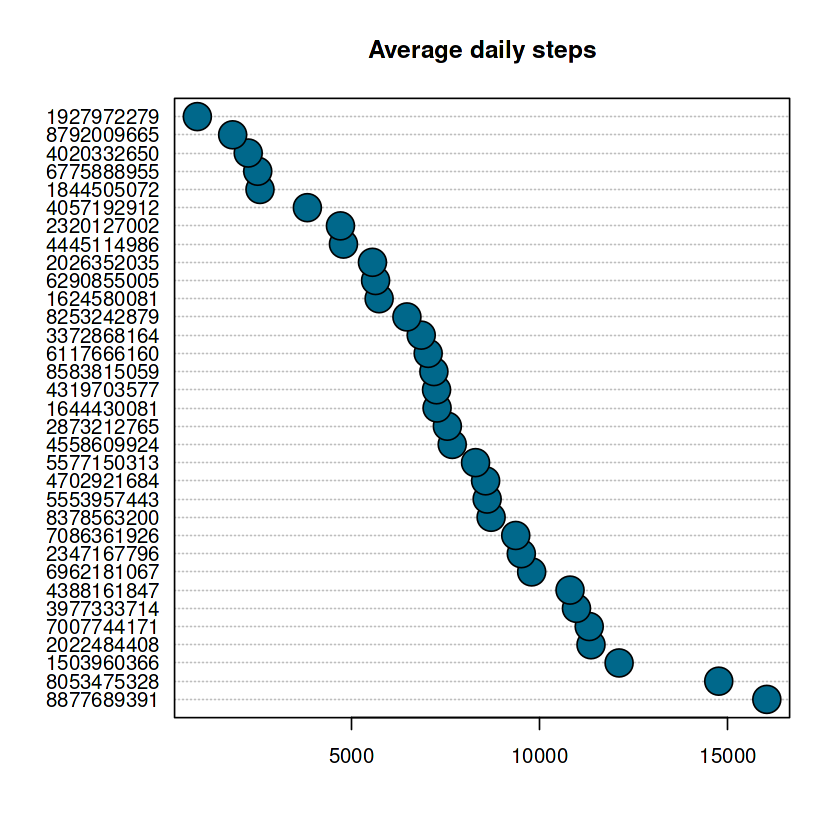

In [16]:
# making a dotchart to see average daily steps for each participant

dotchart(daily_activity_mean$mean_daily_steps, labels = daily_activity_mean$Id, cex = 1, main = "Average daily steps",
    pch = 21, bg = "deepskyblue4", pt.cex = 3)

The dotplot indicates 7 out of 33 participants have more than 10000 steps per day that is recomended steps per day by Disease Control and Prevention (CDC) while the other 26 participants walk less.

**4-5.3 Activity Percentage**

To find out the activity percentage while using smart watch, first I make a column named active_minutes with the sum of all active minutes. Then divide it to sedentary minutes to see the ratio.

In [17]:
# Using smart device to track activity vs inanctivity

dailyActivity_1 <- dailyActivity %>%
  mutate (active_minutes=
            (VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes))%>%
  mutate( activity_perc= (active_minutes/SedentaryMinutes)*100) 
head(dailyActivity_1)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,active_minutes,activity_perc
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,366,50.27473
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,257,33.11856
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,222,18.22660
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,272,37.46556
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,267,34.54075
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,222,41.18738


Afterwards, with() function was used to calculate the average activity percentage per Id.

In [18]:
# average activity percentage

with(dailyActivity_1, by (activity_perc, Id, mean))

Id: 1503960366
[1] 34.87337
------------------------------------------------------------ 
Id: 1624580081
[1] 13.65949
------------------------------------------------------------ 
Id: 1644430081
[1] 19.14286
------------------------------------------------------------ 
Id: 1844505072
[1] 13.32465
------------------------------------------------------------ 
Id: 1927972279
[1] 3.390339
------------------------------------------------------------ 
Id: 2022484408
[1] 28.59851
------------------------------------------------------------ 
Id: 2026352035
[1] 42.85143
------------------------------------------------------------ 
Id: 2320127002
[1] 17.08011
------------------------------------------------------------ 
Id: 2347167796
[1] 51.71169
------------------------------------------------------------ 
Id: 2873212765
[1] 30.54416
------------------------------------------------------------ 
Id: 3372868164
[1] 31.79976
------------------------------------------------------------ 
Id: 397733

The outcome shows one Inf value that needs to fix in the data. I went through the data and the reason is the result of division by zero. So, I use sapply to substitute Inf with NA and then replace it with 0.

In [19]:
#replace Inf with NA and then zero

is.na(dailyActivity_1) <- sapply(dailyActivity_1, is.infinite)
dailyActivity_1

dailyActivity_1 <- dailyActivity_1 %>% 
  replace(is.na(.), 0)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,active_minutes,activity_perc
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,366,50.27473
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,257,33.11856
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,222,18.22660
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,272,37.46556
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,267,34.54075
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,222,41.18738
1503960366,2016-04-18,13019,8.59,8.59,0,3.25,0.64,4.71,0,42,16,233,1149,1921,291,25.32637
1503960366,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,345,44.51613
1503960366,2016-04-20,10544,6.68,6.68,0,1.96,0.48,4.24,0,28,12,205,818,1786,245,29.95110


In [20]:
# double check the outcome to be sure Inf is removed

with(dailyActivity_1, by (activity_perc, Id, mean))

Id: 1503960366
[1] 34.87337
------------------------------------------------------------ 
Id: 1624580081
[1] 13.65949
------------------------------------------------------------ 
Id: 1644430081
[1] 19.14286
------------------------------------------------------------ 
Id: 1844505072
[1] 13.32465
------------------------------------------------------------ 
Id: 1927972279
[1] 3.390339
------------------------------------------------------------ 
Id: 2022484408
[1] 28.59851
------------------------------------------------------------ 
Id: 2026352035
[1] 42.85143
------------------------------------------------------------ 
Id: 2320127002
[1] 17.08011
------------------------------------------------------------ 
Id: 2347167796
[1] 51.71169
------------------------------------------------------------ 
Id: 2873212765
[1] 30.54416
------------------------------------------------------------ 
Id: 3372868164
[1] 31.79976
------------------------------------------------------------ 
Id: 397733

To track the data easier, I make a new df.

In [21]:
# rearrenge the result

average_activities <- dailyActivity_1 %>%
  group_by(Id)%>%
  summarise_at(vars(activity_perc), list(activity_perc=mean))
head(average_activities)

Id,activity_perc
<dbl>,<dbl>
1503960366,34.873373
1624580081,13.659493
1644430081,19.142859
1844505072,13.324652
1927972279,3.390339
2022484408,28.598505


In [22]:
# min and max mean activity percent per Id

min(average_activities$activity_perc)
max(average_activities$activity_perc)

[1] 3.390339

[1] 55.76991

Thus, the minimum activity percenatge is 3.3% and maximum is 55.7% while using the smart device.

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


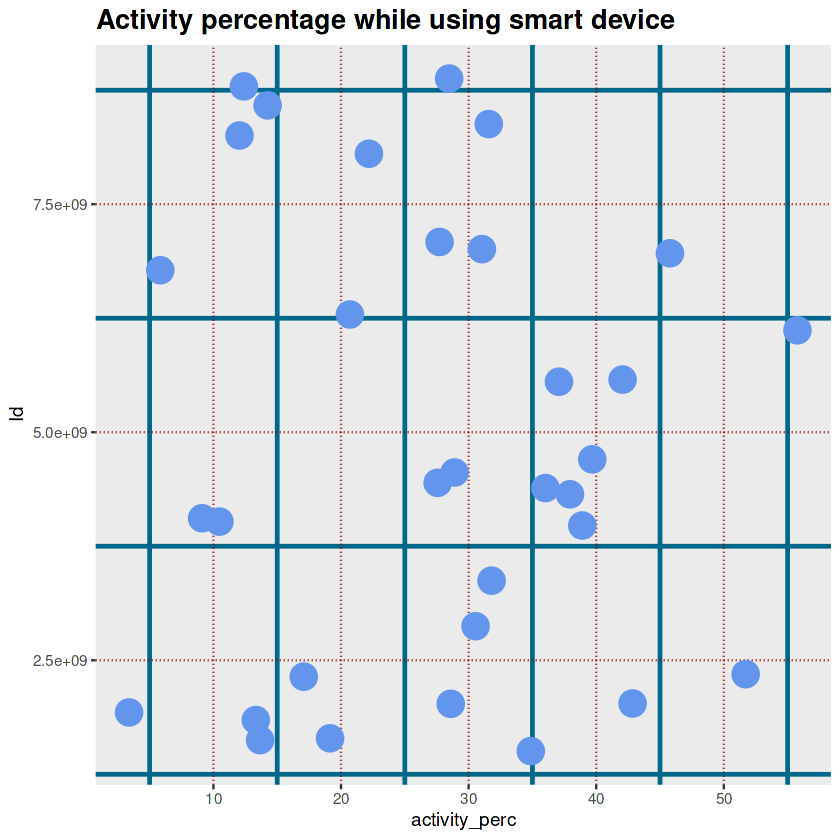

In [23]:
average_activities%>%
ggplot( aes(x=activity_perc, y = Id, color=activity_perc)) +
    geom_point(size= 7, color="cornflowerblue")+
    theme(
    panel.grid.major = element_line(colour = "darkred", linetype = "dotted"),
    panel.grid.minor = element_line(colour = "deepskyblue4", size = 1)
    )+
  labs(title= "Activity percentage while using smart device") +
  theme(plot.title = element_text(face="bold", size = 16))

The scatter plot shows activity percentage varies among participitants

**4-5.4 Average calories burnt per weekday**

The next question to adress is how many calories burnt per weekday. To find out this, first I have to convert activity date to weekdays

In [24]:
# covert activity date to weekdays

dailyActivity$weekday <- weekdays(dailyActivity$ActivityDate)
head(dailyActivity)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,weekday
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,Tuesday
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,Wednesday
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,Thursday
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,Friday
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,Saturday
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,Sunday


The last column was added as weekday. Now, I want to know how many calories burnt per day.

In [25]:
# average calories burnt per day

dailyActivityCalories <- dailyActivity %>%
group_by(weekday) %>% 
summarise(mean_calories = round(mean(Calories)))
head(dailyActivityCalories)

weekday,mean_calories
<chr>,<dbl>
Friday,2332
Monday,2324
Saturday,2355
Sunday,2263
Thursday,2200
Tuesday,2356


To compare the days in parallel, I use ggplot to make a bar chart. Since the day started from Friday in the output, I use Factor()function to start from Monday.

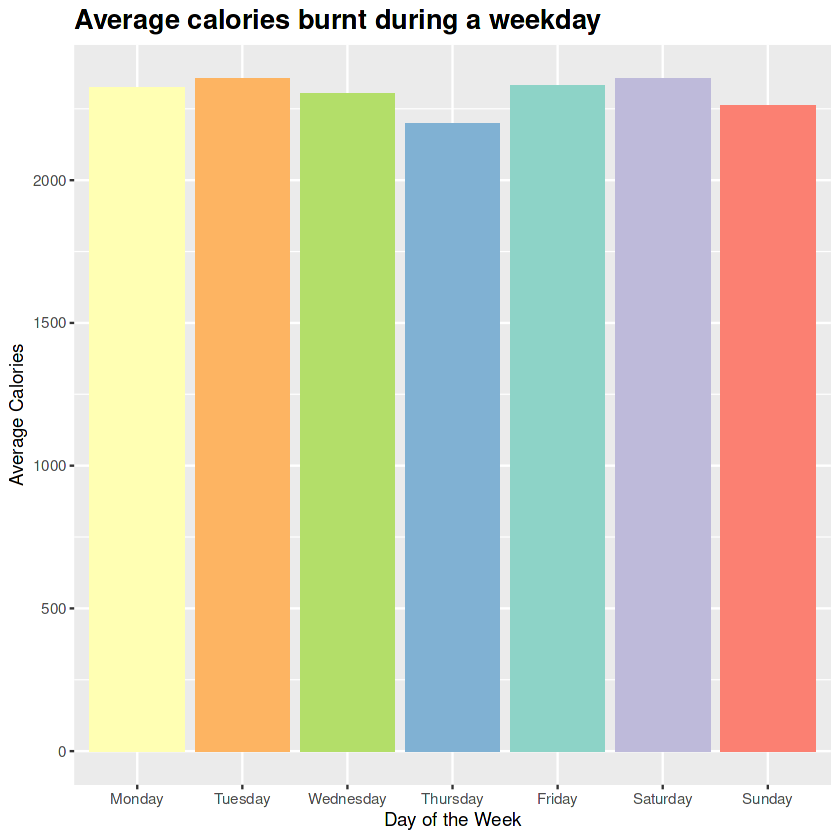

In [26]:
# comparing average calories per weekday

ggplot(dailyActivityCalories, aes(x = factor(weekday, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")), y = mean_calories, fill=weekday)) +
 labs(title = "Average calories burnt during a weekday",
       x = "Day of the Week",
       y = "Average Calories") +
  theme(plot.title=element_text(size = 16,hjust = 0, face="bold"))+
  scale_fill_brewer(palette = "Set3") +
  geom_bar(stat = "identity", show.legend = FALSE)

The bar chart shows participants burned most calories on Tuesday and Saturdays while it seems they are least active on Thursday.

**4-5.5 Sleep disorder**

Based on the data in sleepDay df, I want to know how long does it take for a participant from the time she goes into the bed until the time falling in sleep. This information can help us to see sleeping disorder (insomnia).

In [27]:
# adding a column named InBedAwake

sleepDay_1<- sleepDay %>%
  mutate (InBedAwake = TotalTimeInBed - TotalMinutesAsleep)
head(sleepDay_1)

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,InBedAwake
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,1,327,346,19
1503960366,2016-04-13,2,384,407,23
1503960366,2016-04-15,1,412,442,30
1503960366,2016-04-16,2,340,367,27
1503960366,2016-04-17,1,700,712,12
1503960366,2016-04-19,1,304,320,16


In [28]:
# count the number of days each participant uses smart device, to track sleeping

sleepDay_2<- sleepDay %>%
  group_by(Id)%>%
  count(nrow(SleepDay))
head(sleepDay_2)

Id,n
<dbl>,<int>
1503960366,25
1644430081,4
1844505072,3
1927972279,5
2026352035,28
2320127002,1


In [29]:
# calculating sum of all minutes a participant is awake in bed

sleepDay_3 <- sleepDay_1 %>%
group_by(Id)%>%
summarise(sum_in_bed_awake = sum(InBedAwake, na.rm = TRUE))
head(sleepDay_3)

Id,sum_in_bed_awake
<dbl>,<dbl>
1503960366,573
1644430081,208
1844505072,927
1927972279,104
2026352035,881
2320127002,8


In [30]:
# merge data

InsomniaRate <- merge(sleepDay_2, sleepDay_3, By = "Id")
head(InsomniaRate)

,Id,n,sum_in_bed_awake
,<dbl>,<int>,<dbl>
1,1503960366,25,573
2,1644430081,4,208
3,1844505072,3,927
4,1927972279,5,104
5,2026352035,28,881
6,2320127002,1,8


In [31]:
# change colname

colnames(InsomniaRate)[2] = "number_of_days" 
head(InsomniaRate)

,Id,number_of_days,sum_in_bed_awake
,<dbl>,<int>,<dbl>
1,1503960366,25,573
2,1644430081,4,208
3,1844505072,3,927
4,1927972279,5,104
5,2026352035,28,881
6,2320127002,1,8


In [32]:
# check the awakness in bed according to the number of days

InsomniaRatePerDay <- InsomniaRate %>%
  mutate(total_time_in_bed_awake = (sum_in_bed_awake/number_of_days)) %>%
  arrange(desc(total_time_in_bed_awake))
head(InsomniaRatePerDay)

,Id,number_of_days,sum_in_bed_awake,total_time_in_bed_awake
,<dbl>,<int>,<dbl>,<dbl>
1,1844505072,3,927,309.00000
2,3977333714,28,4690,167.50000
3,1644430081,4,208,52.00000
4,2347167796,15,668,44.53333
5,5553957443,31,1314,42.38710
6,8378563200,31,1265,40.80645


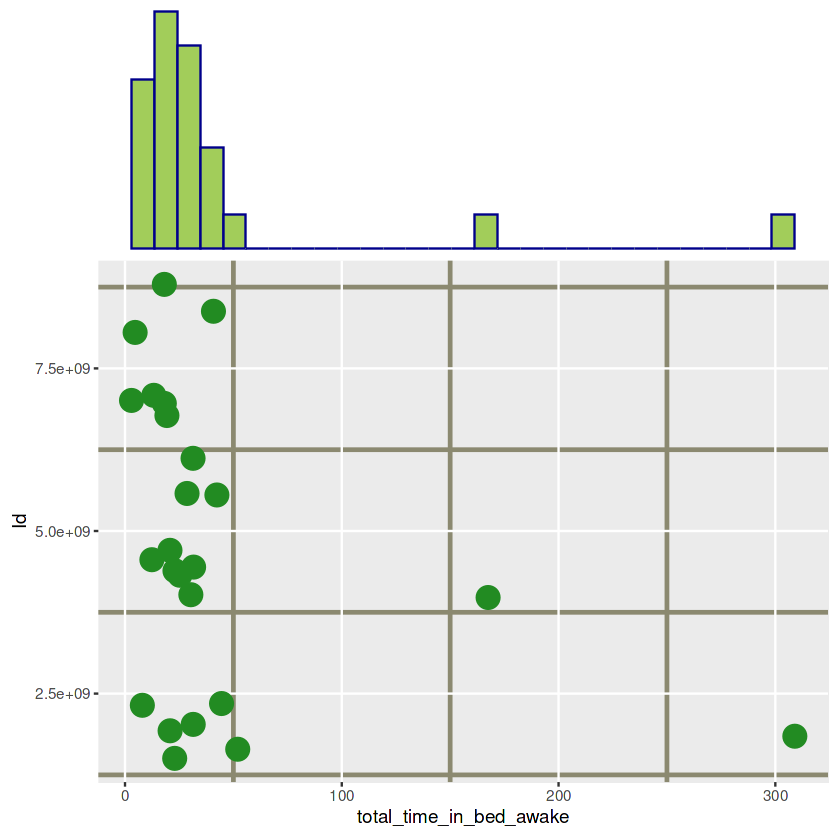

In [33]:
ggMarginal(
    ggplot(InsomniaRatePerDay, aes( x=total_time_in_bed_awake, y = Id)) +
      geom_point(size= 6, color="forestgreen") +
      theme(
    panel.grid.minor = element_line(colour = "lemonchiffon4", size = 1)
    ), 
    margins = "x", size = 2, type = "histogram",
           col = "darkblue", fill = "darkolivegreen3")

By looking at Scatter plot, I can coclude 3 participants sleep immediately after going to the bed. 19 out of 24 fall in sleep in less than 50 minutes. 2 of participants seem to have sleeping problem especially the last one who was awake in th bed for more than 300 minutes in only 3 days.

**4-5.6 Hourly activity level**

Next, I moved to hourly file to track activity. I start by average steps during a day

In [34]:
#separate date and time in 2 columns

hourlyData_1 <- hourlyData %>%
separate(ActivityHour, sep = " ", into = c("date","time")) 
  head(hourlyData_1)

Id,date,time,Calories,TotalIntensity,AverageIntensity,StepTotal
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,00:00:00,81,20,0.333333,373
1503960366,2016-04-12,01:00:00,61,8,0.133333,160
1503960366,2016-04-12,02:00:00,59,7,0.116667,151
1503960366,2016-04-12,03:00:00,47,0,0.000000,0
1503960366,2016-04-12,04:00:00,48,0,0.000000,0
1503960366,2016-04-12,05:00:00,48,0,0.000000,0


In [35]:
# average steps per day

hourlyData_2 <- hourlyData_1 %>%
  group_by(time) %>%
  summarise(average_steps = mean(StepTotal))%>%
  arrange(time)
head(hourlyData_1)

Id,date,time,Calories,TotalIntensity,AverageIntensity,StepTotal
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,00:00:00,81,20,0.333333,373
1503960366,2016-04-12,01:00:00,61,8,0.133333,160
1503960366,2016-04-12,02:00:00,59,7,0.116667,151
1503960366,2016-04-12,03:00:00,47,0,0.000000,0
1503960366,2016-04-12,04:00:00,48,0,0.000000,0
1503960366,2016-04-12,05:00:00,48,0,0.000000,0


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


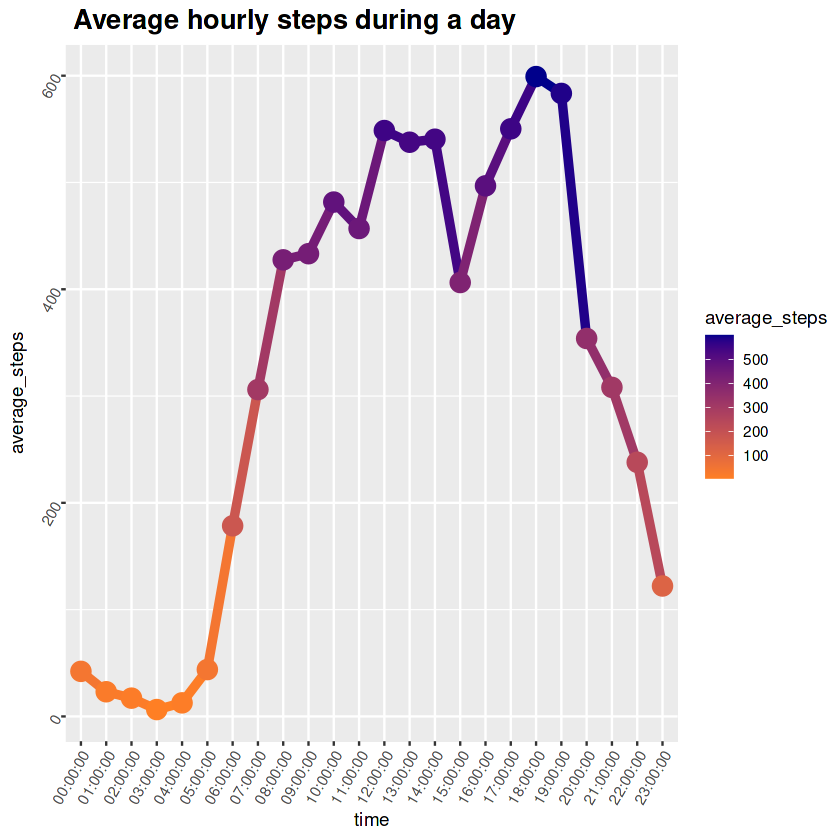

In [36]:
ggplot(data= hourlyData_2, aes(x = time, y= average_steps, color= average_steps )) +
 geom_line (aes(group = 1), size= 2) +
  geom_point(size=5) +
  labs (title = " Average hourly steps during a day") +
  scale_color_gradient(low= "chocolate1", high = "blue4")+
  theme(plot.title = element_text(size = 16, face= "bold")) +
  theme(axis.text = element_text(angle = 60, hjust = 1))

The average steps increases gradually from 5:00 A.M till midnoon and goes down. Then, incraeses from 15:00 and reaches to maximum at 18:00.

In [37]:
# average calories burnt per hour

hourlyData_3<- hourlyData_1 %>%
  group_by(time) %>%
  summarise(average_calories = mean(Calories))%>%
  arrange(time)
head(hourlyData_3)

time,average_calories
<chr>,<dbl>
00:00:00,71.80514
01:00:00,70.16506
02:00:00,69.18650
03:00:00,67.53805
04:00:00,68.26180
05:00:00,81.70815


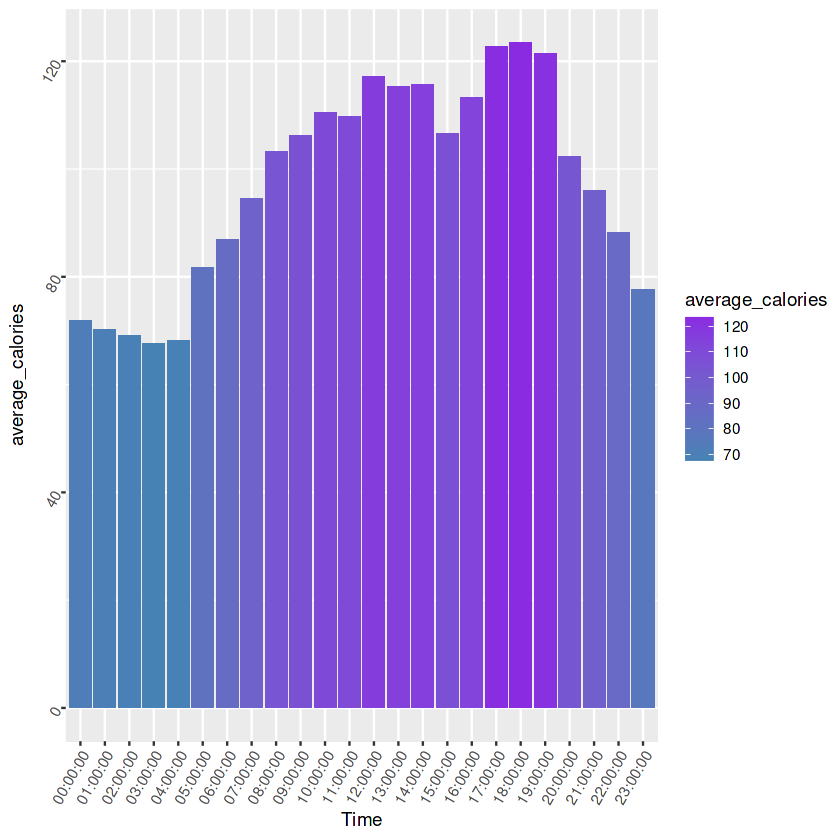

In [38]:
ggplot(data= hourlyData_3 , aes(x= time, y= average_calories, fill= average_calories)) +
  geom_col(aes(group = 1)) +
  labs(x = "Time", y = "average_calories") +
  scale_fill_gradient(low = "steelblue", high = "blueviolet") + 
  theme(axis.text = element_text(angle = 60, hjust = 1))

The histogram indicates the maximum calories burnt between 17:00 and 19:00.

# <span style="color:blue;"> 6. Act  </span>


Based on the findings, recommendations are:

Majority of customers are categorized in high usage participants. This means people are interested in smart device not only because it is a trend but also, it’s beneficial to them. Marketing could focus on designing the App to measure resting heart rate, respiratory rate and cardiac coherence overnight to clarify smart device is not just for sport time. This could help low user and moderate users apply smart device more frequently and track their health condition.

Only 7 out of 33 participants walk 10000 step per day (recommended by CDC). The App could send notifications to users when they are in sedentary lifestyle. This helps to people who have desk job.

Activity percentage while using smart device was different among participants. Some had very little activity and 2 persons were very active. To encourage people to be more active, one option is to award points to users according to their activity. The points could be accumulated and use as a discount for the next product purchase.

Regarding sleeping, the App should remind customers to sleep at specific time every night. Also, it should measure the length of Non-Rapid Eye Movement (NREM) and Rapid Eye Movement (REM) to track healthy sleep.

Thanks for reading my capstone. Please comment and upvote if you like.

<span style="color:steelblue;"> Thanks for reading my capstone. Please comment and upvote if you like. </span>